# 자료의 분포 연습:  요약 통계량의 정의, 정규분포

In [1]:
https://www.chosun.com/international/china/2022/10/16/PS34GVMYRZCOFGJRLPWUDFVHU4/import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

/Users/ylee19067/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 자료의 분포를 나타내는 요약 통계량

자료의 중심을 나타내는 대표값 

- 평균 (mean, average)
- 중간값 (중위수, median)

- 중간값의 계산
  
  + 자료를 순서대로 늘어놓았을 때 중간에 오는 값
  + 자료의 길이 n이 홀수이면 (n + 1)/2번째의 값이고 
  + 자료의 길이 n이 짝수이면 n/2번째의 값과 n/2 + 1번째 값의 평균이다.

자료의 극단(extreme)을 나타내는 대표값

- 최소값과 최대값

자료의 퍼진 정도를 나타내는 대표값

- 하위 50% 집단의 중간값 (아래 4분위수: Q1) => 1/4 번째 수
- 상위 50% 집단의 중간값 (위 4분위수: Q3) => 3/4 번째 수
- **k 번째 수의 순서: (k-1)/(n-1) 번째**

4분위수 거리 (IQR, inter-quanrtile range; inter-quantile range) 

  - IQR = Q3 − Q1


### 예제 1

1,2,3,4,5,6,7,8,9,10

- Q1?

  + n = 10 이므로 3 는 (3 -1 )/(10-1) = 2/9 번째 수
  + n = 10 이므로 4 는 (4 -1 )/(10-1) = 3/9 번째 수
  + Q1 = 1/4 번째 수
  + 따라서 

  $$ Q1 = 3\frac{(3/9-1/4)}{(3/9-2/9)} + 4\frac{(1/4-2/9)}{(3/9-2/9)} = 3.25 $$

- Q3?

  + n = 10 이므로 7 는 (7 -1 )/(10-1) = 6/9 번째 수
  + n = 10 이므로 8 는 (8 -1 )/(10-1) = 7/9 번째 수
  + Q1 = 3/4 번째 수
  + 따라서 
  
  $$ Q3 = 7 \frac{(7/9-3/4)}{(7/9-6/9)} + 8\frac{(3/4-6/9)}{(7/9-6/9)} = 7.75 $$


In [3]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
(x-1)/(len(x)-1) # 순서 

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [5]:
df1 = pd.DataFrame({'x': x})

In [6]:
df1

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [7]:
df1.describe()

,x
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


### 예제 2

1,2,3,4,5,6,7,8,9

- Q1?

  + n = 9 이므로 3 는 (3 -1 )/(9-1) = 2/8 = 1/4 번째 수
  + Q1 = 1/4 번째 수
  + 따라서 Q1 = 3

- Q3?

  + n = 9 이므로 7 는 (7 -1 )/(9-1) = 6/8 = 3/4 번째 수
  + Q3 = 3/4 번째 수
  + 따라서 Q3 = 7


In [8]:
x=np.array([1,2,3,4,5,6,7,8,9])

In [9]:
(x-1)/(len(x)-1) # 순서

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [10]:
df2 = pd.DataFrame({'x': x})

In [11]:
df2

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [12]:
df2.describe()

,x
count,9.000000
mean,5.000000
std,2.738613
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


### 상자그림

-  자료의 분포을 나타내는 그림

- box plot

- 위 선 끝점: Q3 + (1.5)IQR

- 상자 위: 75% 백분위수 (3사분위수, Q3)

- 상자 중앙: 중앙값(median)

- 상자 아래 : 25% 백분위수 (1사분위수, Q1)

- 아래 선 끝점: Q1 - (1.5)IQR


In [13]:
y = np.random.rand(50)

In [14]:
df3 = pd.DataFrame({'y':y})

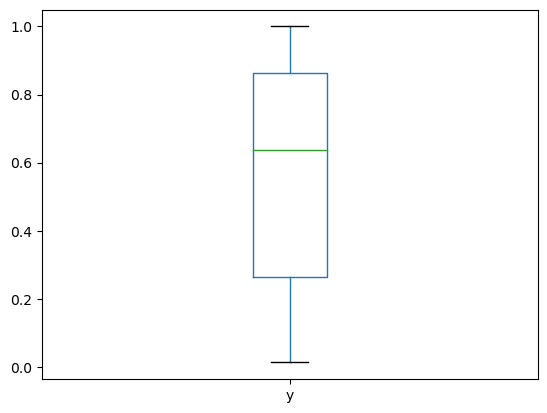

In [15]:
boxplot = df3.plot.box(y='y')

### 이상점

- 이상점, 특이값 (outlier)
- 자료의 값들 중 전체적인 경향에서 벗어난 값
- 이상점은 잘못된 값일 수도 있으나 (예: 입력오류) 자료의 일부분인 경우도 흔하다 (예: 대한민국 국가대표의 연봉 중 손흥민의 연봉)
- 이상점의 판별 - 매우 어려움
- 이상점이 존재하는 경우 자료의 요약에 대하여 세심한 주의를 기울여야 한다 (예: median의 사용)

다음 두 자료 의 평균과 중앙값은?

    자료1: 1, 2, 3, 4, 5
   
    자료2: 1, 2, 3, 4, 100

- 매우 특이한 값이 존재하거나 자료가 매우 비대칭일 경우 중심의 측도로서 평균은 적절치 않다.

## 정규분포

- 평균 $\mu$이고 분산이 $\sigma^2$인 정규분포를 $N(\mu,~\sigma^2)$로 표시한다.

- $N(\mu,~\sigma^2)$의 확률밀도함수

$$ f(x; \mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left (-\frac{ (x-\mu)^2}{2\sigma^2} \right ) $$


- 평균 $\mu$를 중심으로 대칭이며 꼬리의 확률이 빠르게 줄어드는 분포

-  평균 0 이고 분산이 1인 정규분포는 표준정규분포 ($N(0,1)$, standard normal distribution)

- 자료의 퍼진 정도가  분산 $\sigma^2$에 따라 다르다.

- $X$의  분포가 $N(\mu,~\sigma^2)$일 때 $Z=(X-\mu)/\sigma$의 분포는 $N(0,1)$이다.


### 표준 정규분포의 확률밀도함수

정규분포의 평균과 표준편차의 값은 아래 `mu` 와 `sigma` 값입니다. 

**참고: 아래 정규분포의 확률밀도함수를 그리는 파이썬 표현식은 시함이나 과제에 나오지 않습니다. 학생들의 이해를 돕기 위하여 그래프를 그리는 프로그램이므로 따로 공부할 필요는 없습니다.**


In [16]:
mu=0
sigma=1
normal_distribution=stats.norm(mu,sigma)

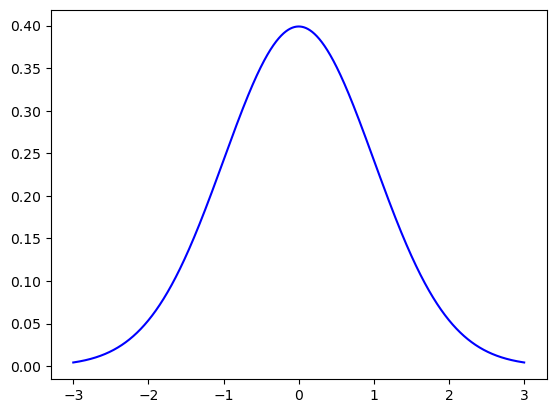

In [17]:
heights=np.linspace(mu-3*sigma, mu+3*sigma,10000)
plt.plot(heights,normal_distribution.pdf(heights),'b')

### 정규분포의 확률 계산

$X$의  분포가 $N(\mu,~\sigma^2)$일 때, 임의의  $a<b$ 에 대하여 



$$
\begin{align*}
 P(a \le X \le b) & = \int_a^b f(z; \mu, \sigma)~~dz \\
  & =  P(-\infty \le X \le b)  - P(-\infty \le X \le a)  
\end{align*}
$$


$$
\begin{align*} 
P(-\infty \le X \le b)  &= \int^b_{-\infty}f(z; \mu, \sigma)~~dz \\
 & = \texttt{normal_distribution.cdf(b)} 
 \end{align*}
 $$

### 정규분포의 성질

$X$의  분포가 $N(\mu,~\sigma^2)$일 때

\begin{eqnarray*}
 P( \mu-\sigma <X<\mu+\sigma) =& 0.683 \quad \text{(blue area)}\\
 P( \mu-2\sigma <X<\mu+2\sigma) =& 0.954 \quad \text{(green area)}\\
 P( \mu-3\sigma <X<\mu+3\sigma) =& 0.995 \quad \text{(red area)}
 \end{eqnarray*} 



In [18]:
normal_distribution.cdf(mu+sigma) - normal_distribution.cdf(mu-sigma)

0.6826894921370859

In [19]:
normal_distribution.cdf(mu+2*sigma) - normal_distribution.cdf(mu-2*sigma)

0.9544997361036416

In [20]:
normal_distribution.cdf(mu+3*sigma) - normal_distribution.cdf(mu-3*sigma)

0.9973002039367398

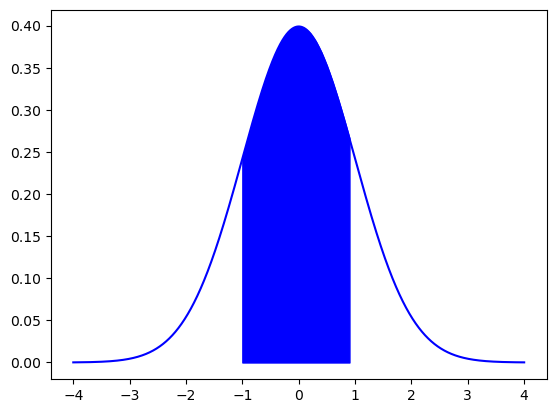

In [21]:
heights=np.linspace(mu-4*sigma, mu+4*sigma,10000)
plt.plot(heights,normal_distribution.pdf(heights),'b')

area=np.arange(mu-sigma,mu+sigma ,0.1)
plt.fill_between(area,normal_distribution.pdf(area),color='b')

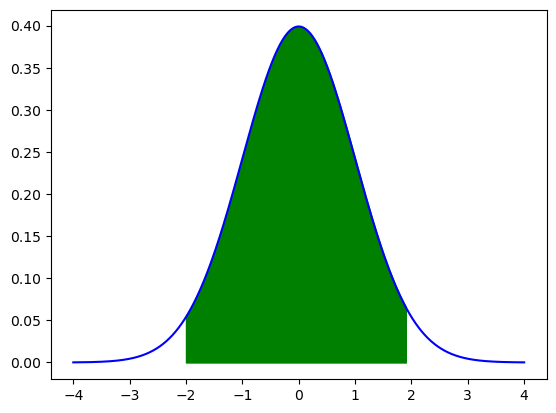

In [22]:
heights=np.linspace(mu-4*sigma, mu+4*sigma,10000)
plt.plot(heights,normal_distribution.pdf(heights),'b')

area=np.arange(mu-2*sigma,mu+2*sigma ,0.1)
plt.fill_between(area,normal_distribution.pdf(area),color='g')

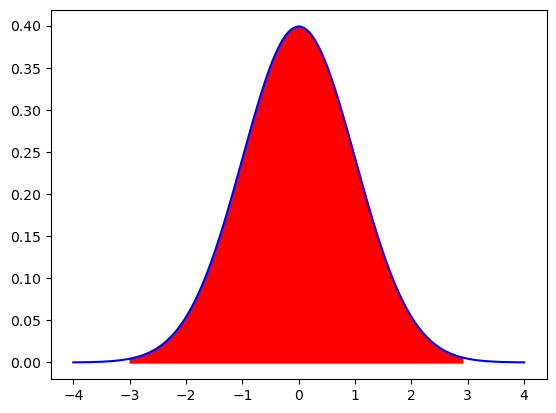

In [23]:
heights=np.linspace(mu-4*sigma, mu+4*sigma,10000)
plt.plot(heights,normal_distribution.pdf(heights),'b')

area=np.arange(mu-3*sigma,mu+3*sigma ,0.1)
plt.fill_between(area,normal_distribution.pdf(area),color='r')

### 정규분포에서 난수 추출


라이브러리 `numpy` 의 `np.random.normal(mu, sigma, n)` 함수를 사용한다.

In [24]:
df3= pd.DataFrame({'x': np.random.normal(mu, sigma, 1000)})

<AxesSubplot:ylabel='Frequency'>

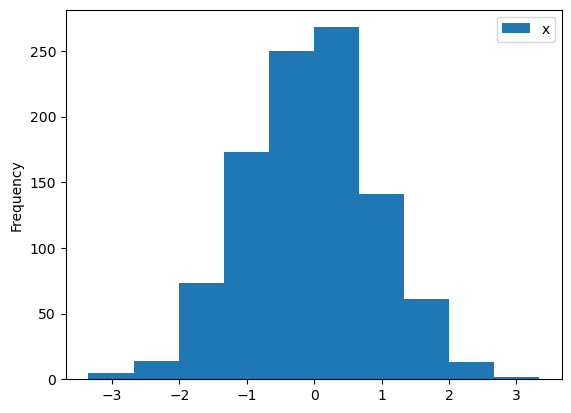

In [25]:
df3.plot.hist(y='x')

<AxesSubplot:>

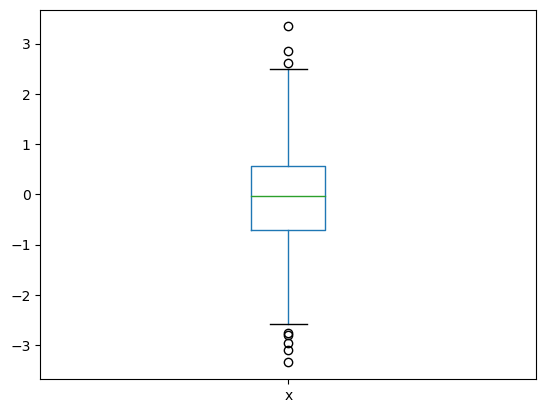

In [26]:
df3.plot.box(y='x')

In [27]:
df3.describe()

,x
count,1000.000000
mean,-0.054477
std,0.970082
min,-3.348352
25%,-0.713155
50%,-0.035265
75%,0.569991
max,3.340564
